x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Not using data augmentation.
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_21 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_22 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 16, 16, 32)        0         
__________________

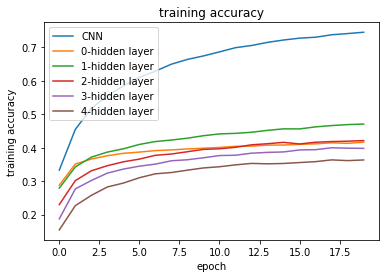

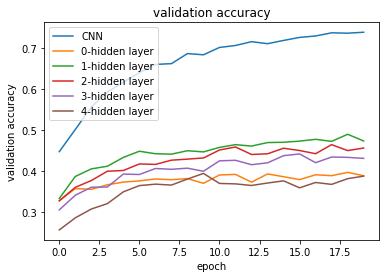

Test accuracy of Model - CNN: 0.7329999804496765
Test accuracy of Model - Simple Dense w/ 0-hidden layer: 0.39800000190734863
Test accuracy of Model - Simple Dense w/ 1-hidden layer: 0.4916999936103821
Test accuracy of Model - Simple Dense w/ 2-hidden layer: 0.4708999991416931
Test accuracy of Model - Simple Dense w/ 3-hidden layer: 0.44440001249313354
Test accuracy of Model - Simple Dense w/ 4-hidden layer: 0.40059998631477356


In [2]:
# libraries (do not import additional libraries)
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
import math
import matplotlib.pyplot as plt

# parameters for this script
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = False

# Load the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define a convolutional neural network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Define a 0-hidden dense neural network
model0 = Sequential()
model0.add(Flatten())
model0.add(Dense(num_classes))
model0.add(Activation('softmax'))

# Define a 1-hidden dense neural network
model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes))
model1.add(Activation('softmax'))

# Define a 2-hidden layer dense neural network 
model2 = Sequential()
model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

# Define a 3-hidden layer dense neural network 
model3 = Sequential()
model3.add(Flatten())
model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes))
model3.add(Activation('softmax'))

# Define a 4-hidden layer dense neural network 
model4 = Sequential()
model4.add(Flatten())
model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))
model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))
model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))
model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))
model4.add(Dense(num_classes))
model4.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
opt0 = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
opt1 = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
opt2 = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
opt3 = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
opt4 = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Compile the model before using it
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model.save_weights('model.h5')
model0.compile(loss='categorical_crossentropy',
              optimizer=opt0,
              metrics=['accuracy'])
model1.compile(loss='categorical_crossentropy',
              optimizer=opt1,
              metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy',
              optimizer=opt2,
              metrics=['accuracy'])
model3.compile(loss='categorical_crossentropy',
              optimizer=opt3,
              metrics=['accuracy'])
model4.compile(loss='categorical_crossentropy',
              optimizer=opt4,
              metrics=['accuracy'])

# normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# partition training set into training and validation set
x_validate = x_train[40000:,:]
x_train = x_train[:40000,:]
y_validate = y_train[40000:,:]
y_train = y_train[:40000,:]

# create a callback that will save the best model while training
save_best_model = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)
save_best_model0 = ModelCheckpoint('best_model0.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)
save_best_model1 = ModelCheckpoint('best_model1.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)
save_best_model2 = ModelCheckpoint('best_model2.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)
save_best_model3 = ModelCheckpoint('best_model3.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)
save_best_model4 = ModelCheckpoint('best_model4.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

# train without data augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model], verbose=0)
    history0 = model0.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model0], verbose=0)
    history1 = model1.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model1], verbose=0)
    history2 = model2.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model2], verbose=0)
    history3 = model3.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model3], verbose=0)
    history4 = model4.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model4],verbose=0)

# train with data augmentation
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        callbacks=[save_best_model])
print(model.summary())
print(model0.summary())
print(model1.summary())
print(model2.summary())
print(model3.summary())
print(model4.summary())

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history0.history['accuracy'])
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.plot(history4.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['CNN','0-hidden layer','1-hidden layer','2-hidden layer','3-hidden layer','4-hidden layer'],loc = 'upper left')
plt.show()

# Plot validation accuracy
plt.plot(history.history['val_accuracy'])
plt.plot(history0.history['val_accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['CNN','0-hidden layer','1-hidden layer','2-hidden layer','3-hidden layer','4-hidden layer'],loc = 'upper left')
plt.show()

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model = load_model('best_model.h5')
saved_model0 = load_model('best_model0.h5')
saved_model1 = load_model('best_model1.h5')
saved_model2 = load_model('best_model2.h5')
saved_model3 = load_model('best_model3.h5')
saved_model4 = load_model('best_model4.h5')
scores = saved_model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy of Model - CNN:', scores[1])
scores = saved_model0.evaluate(x_test, y_test, verbose=0)
print('Test accuracy of Model - Simple Dense w/ 0-hidden layer:', scores[1])
scores = saved_model1.evaluate(x_test, y_test, verbose=0)
print('Test accuracy of Model - Simple Dense w/ 1-hidden layer:', scores[1])
scores = saved_model2.evaluate(x_test, y_test, verbose=0)
print('Test accuracy of Model - Simple Dense w/ 2-hidden layer:', scores[1])
scores = saved_model3.evaluate(x_test, y_test, verbose=0)
print('Test accuracy of Model - Simple Dense w/ 3-hidden layer:', scores[1])
scores = saved_model4.evaluate(x_test, y_test, verbose=0)
print('Test accuracy of Model - Simple Dense w/ 4-hidden layer:', scores[1])

# Part 1 : Discussion

> A Convolutional Neural Network performs better because it is sparce as the convolutional units are many to one mappings and it thereby reduces the number of parameters to learn. It also uses shared weights. These reduces the chance of overfitting as the model would be less complex than a Fully Connected Neural Net. It is due to the architecture of CNN with the convolutional units that enables it to converge faster as compared to the simple dense neural net.

> On the other hand, in a fully connected neural network, the number of trainable parameters increases as the number of hidden dense layer. Correspondingly, it should have a more data points or more epochs, lest, the weights will not get improved as the depth increases. Thus, we see that among the simple dense neural net, the accuracy does not really increase with the increase in the number of hidden layer. 





Not using data augmentation.
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_42 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_43 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)      

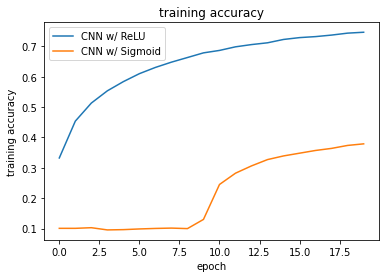

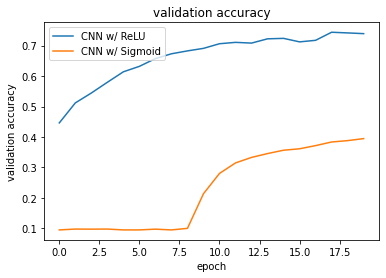

Test accuracy of Model - CNN w/ ReLu: 0.7329999804496765
Test accuracy of Model - CNN w/ Sigmoid: 0.4065000116825104


In [3]:
# Define a convolutional neural network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Define a CNN with sigmoid activation function
model5 = Sequential()
model5.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model5.add(Activation('sigmoid'))
model5.add(Conv2D(32, (3, 3), padding='same'))
model5.add(Activation('sigmoid'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

model5.add(Conv2D(64, (3, 3), padding='same'))
model5.add(Activation('sigmoid'))
model5.add(Conv2D(64, (3, 3), padding='same'))
model5.add(Activation('sigmoid'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

model5.add(Flatten())
model5.add(Dense(512))
model5.add(Activation('sigmoid'))
model5.add(Dropout(0.5))
model5.add(Dense(num_classes))
model5.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
opt5 = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Compile the model before using it
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model.load_weights('model.h5')
model5.compile(loss='categorical_crossentropy',
              optimizer=opt5,
              metrics=['accuracy'])

# create a callback that will save the best model while training
save_best_model = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)
save_best_model5 = ModelCheckpoint('best_model5.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

# train without data augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model], verbose=0)
    history5 = model5.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model5], verbose=0)
    
print(model.summary())
print(model5.summary())

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history5.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['CNN w/ ReLU','CNN w/ Sigmoid'],loc = 'upper left')
plt.show()

# Plot validation accuracy
plt.plot(history.history['val_accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['CNN w/ ReLU','CNN w/ Sigmoid'],loc = 'upper left')
plt.show()

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model5 = load_model('best_model5.h5')

scores = saved_model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy of Model - CNN w/ ReLu:', scores[1])
scores = saved_model5.evaluate(x_test, y_test, verbose=0)
print('Test accuracy of Model - CNN w/ Sigmoid:', scores[1])

# Part 2 : Discussion

> ReLu activation function performs much better than the Sigmoid activation function. This is because, sigmoid function has a gradient value between 0 and 1, which makes it more prone to the problem of vanishing gradient. This means that the gradient at lower layers of the architecture tends to zero. That is, there will be no improvement in the weights. Here, we see that, in the initial epochs the accuracy is constant and is not getting improved. This could be possible because, the values would be closer to the tails of the sigmoid function, where the gradient is close to zero.

> The ReLu activation function has gradient value equal to 1 or 0. Thus, this mitigates the problem of vanishing gradients. 



Using real-time data augmentation.
Not using data augmentation.
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_54 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_55 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 16, 16, 32)        0         
_______________________________________________________

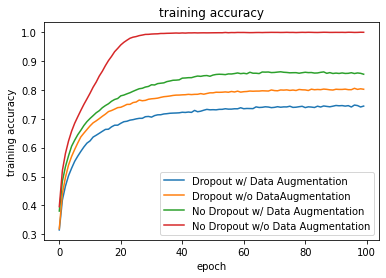

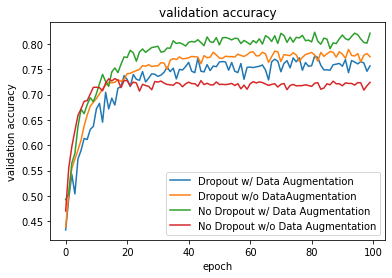

Test accuracy of Model - Dropout, Data Augmentation: 0.7745000123977661
Test accuracy of Model - Dropout, No Data Augmentation: 0.7828999757766724
Test accuracy of Model - No Dropout, Data Augmentation: 0.8137000203132629
Test accuracy of Model - No Dropout, No Data Augmentation: 0.7260000109672546


In [4]:
data_augmentation_list = [True, False]
epochs = 100

# Define a CNN w/ dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Define a CNN w/o dropout
model6 = Sequential()
model6.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model6.add(Activation('relu'))
model6.add(Conv2D(32, (3, 3), padding='same'))
model6.add(Activation('relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))

model6.add(Conv2D(64, (3, 3), padding='same'))
model6.add(Activation('relu'))
model6.add(Conv2D(64, (3, 3), padding='same'))
model6.add(Activation('relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))

model6.add(Flatten())
model6.add(Dense(512))
model6.add(Activation('relu'))
model6.add(Dense(num_classes))
model6.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
opt6 = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Compile the model before using it
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model.load_weights('model.h5')
model6.compile(loss='categorical_crossentropy',
              optimizer=opt6,
              metrics=['accuracy'])
model6.save_weights('model6.h5')

# create a callback that will save the best model while training
save_best_modelw = ModelCheckpoint('best_modelw.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)
save_best_modelwo = ModelCheckpoint('best_modelwo.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)
save_best_model6w = ModelCheckpoint('best_model6w.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)
save_best_model6wo = ModelCheckpoint('best_model6wo.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

# train without data augmentation
for i in data_augmentation_list:
  if not i:
    model.load_weights('model.h5')
    model6.load_weights('model6.h5')
    print('Not using data augmentation.')
    historywo = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_modelwo], verbose=0)
    history6wo = model6.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model6wo], verbose=0)
  # train with data augmentation
  else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    historyw = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        callbacks=[save_best_modelw], verbose=0)
    history6w = model6.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        callbacks=[save_best_model6w], verbose=0)
   
print(model.summary())
print(model6.summary())

# Plot training accuracy
plt.plot(historyw.history['accuracy'])
plt.plot(historywo.history['accuracy'])
plt.plot(history6w.history['accuracy'])
plt.plot(history6wo.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['Dropout w/ Data Augmentation','Dropout w/o DataAugmentation','No Dropout w/ Data Augmentation','No Dropout w/o Data Augmentation'],loc = 'lower right')
plt.show()

# Plot validation accuracy
plt.plot(historyw.history['val_accuracy'])
plt.plot(historywo.history['val_accuracy'])
plt.plot(history6w.history['val_accuracy'])
plt.plot(history6wo.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['Dropout w/ Data Augmentation','Dropout w/o DataAugmentation','No Dropout w/ Data Augmentation','No Dropout w/o Data Augmentation'],loc = 'lower right')
plt.show()

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_modelw = load_model('best_modelw.h5')
saved_modelwo = load_model('best_modelwo.h5')
saved_model6w = load_model('best_model6w.h5')
saved_model6wo = load_model('best_model6wo.h5')

scores = saved_modelw.evaluate(x_test, y_test, verbose=0)
print('Test accuracy of Model - Dropout, Data Augmentation:', scores[1])
scores = saved_modelwo.evaluate(x_test, y_test, verbose=0)
print('Test accuracy of Model - Dropout, No Data Augmentation:', scores[1])
scores = saved_model6w.evaluate(x_test, y_test, verbose=0)
print('Test accuracy of Model - No Dropout, Data Augmentation:', scores[1])
scores = saved_model6wo.evaluate(x_test, y_test, verbose=0)
print('Test accuracy of Model - No Dropout, No Data Augmentation:', scores[1])

# Part 3 : Discussion

> The model without dropout and without data augmentation seems to converge/learn fastest but, they seems to be overfitting. So, this model does not perform good on any unseen dataset. Despite having a high training accuracy, it has a very low test accuracy.

> The model without dropout and with data augmentation is the architecture that learns second fastest. With data augmentation they seem to be more robust to overfitting and it also generalizes better.

> The CNN architecture with dropout tends to learn slower compared to that without dropout. But, they tend to be more robust to overfitting and thereby performs better on unseen data ,ie: validation and test set.

> In general, model architecture with data augmentation generalizes better compared to those without data augmentation. But, when there is dropout, data augmentation worsens the accuracy.

> Thus we see here, that the model without dropout and with data augmentation performs better of the four.











Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_66 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_67 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)      

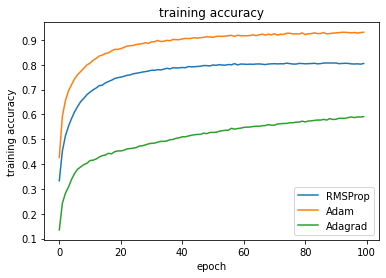

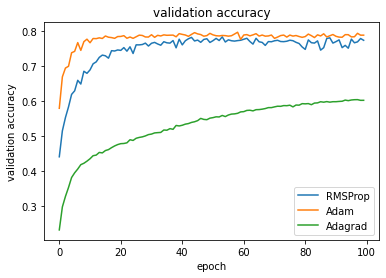

Test accuracy of CNN with RMSprop: 0.7746000289916992
Test accuracy of CNN with Adam: 0.789900004863739
Test accuracy of CNN with Adagrad: 0.6033999919891357


In [5]:
epochs = 100

# Define a convolutional neural network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
# opt_adagrad = keras.optimizers.adagrad()

# Compile the model before using it
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model.load_weights('model.h5')
print(model.summary())

# create a callback that will save the best model while training
save_best_model9 = ModelCheckpoint('best_model9.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)
save_best_model7 = ModelCheckpoint('best_model7.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)
save_best_model8 = ModelCheckpoint('best_model8.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

# train without data augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    history9 = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model9], verbose=0)

# Compile the model with adam optimizer before using it
model.load_weights('model.h5')
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train without data augmentation
print('Not using data augmentation.')
history7 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_validate, y_validate),
                    shuffle=True,
                    callbacks=[save_best_model7], verbose=0)

# Compile the model with adagrad optimizer before using it
model.compile(loss='categorical_crossentropy',
              optimizer='adagrad',
              metrics=['accuracy'])
model.load_weights('model.h5')

# train without data augmentation
print('Not using data augmentation.')
history8 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_validate, y_validate),
                    shuffle=True,
                    callbacks=[save_best_model8], verbose=0)

# Plot training accuracy
plt.plot(history9.history['accuracy'])
plt.plot(history7.history['accuracy'])
plt.plot(history8.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['RMSProp','Adam','Adagrad'], loc='lower right')
plt.show()

# Plot validation accuracy
plt.plot(history9.history['val_accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.plot(history8.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['RMSProp','Adam','Adagrad'], loc='lower right')
plt.show()

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model9 = load_model('best_model9.h5')
saved_model7 = load_model('best_model7.h5')
saved_model8 = load_model('best_model8.h5')

scores = saved_model9.evaluate(x_test, y_test, verbose=0)
print('Test accuracy of CNN with RMSprop:', scores[1])
scores = saved_model7.evaluate(x_test, y_test, verbose=0)
print('Test accuracy of CNN with Adam:', scores[1])
scores = saved_model8.evaluate(x_test, y_test, verbose=0)
print('Test accuracy of CNN with Adagrad:', scores[1])

# part 4 : Discussion

> The model with Adam optimizer performs better that using Adagrad and RMSprop. For an Adagrad optimizer, the learning rate decays too quickly and the model converges faster. But, the weights does not improve as the learning rate decreases. For an RMSprop optimizer, its computes the weighted moving average of the gradients, so that it improves on the Adagrad optimizer and gives better results. But it still lacks momentum. 

> The Adam optimizer gives the best results as it induces momentum by improving the weights in the direction of the moving average instead of the gradient itself. This would have right effect and works more efficiently and faster in converging to the optimum weight. 



Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_72 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_73 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 64)      

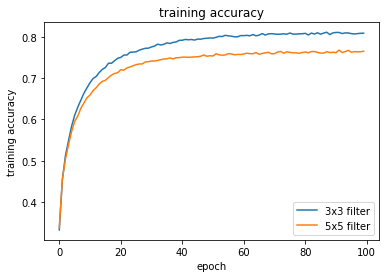

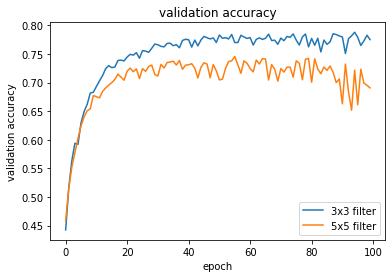

Test accuracy of Model w/ 3x3 filter: 0.7836999893188477
Test accuracy of Model w/ 5x5 filter: 0.7364000082015991


In [6]:
epochs = 100
# Define a CNN with 3x3 filter
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Define a CNN with 5x5 filter
model10 = Sequential()
model10.add(Conv2D(32, (5, 5), padding='same',input_shape=x_train.shape[1:]))
model10.add(Activation('relu'))
model10.add(MaxPooling2D(pool_size=(2, 2)))
model10.add(Dropout(0.25))

model10.add(Conv2D(64, (5, 5), padding='same'))
model10.add(Activation('relu'))
model10.add(MaxPooling2D(pool_size=(2, 2)))
model10.add(Dropout(0.25))

model10.add(Flatten())
model10.add(Dense(512))
model10.add(Activation('relu'))
model10.add(Dropout(0.5))
model10.add(Dense(num_classes))
model10.add(Activation('softmax'))

# initiate RMSprop optimizer
opt11 = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
opt10 = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Compile the model before using it
model.compile(loss='categorical_crossentropy',
              optimizer=opt11,
              metrics=['accuracy'])
model.load_weights('model.h5')
model10.compile(loss='categorical_crossentropy',
              optimizer=opt10,
              metrics=['accuracy'])
print(model.summary())
print(model10.summary())

# create a callback that will save the best model while training
save_best_model10 = ModelCheckpoint('best_model10.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)
save_best_model11 = ModelCheckpoint('best_model11.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

# train without data augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    history10 = model10.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model10], verbose=0)
    history11 = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model11], verbose=0)

# Plot training accuracy
plt.plot(history11.history['accuracy'])
plt.plot(history10.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['3x3 filter','5x5 filter'], loc='lower right')
plt.show()

# Plot validation accuracy
plt.plot(history11.history['val_accuracy'])
plt.plot(history10.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['3x3 filter','5x5 filter'], loc='lower right')
plt.show()

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model10 = load_model('best_model10.h5')
saved_model11 = load_model('best_model11.h5')

scores = saved_model11.evaluate(x_test, y_test, verbose=0)
print('Test accuracy of Model w/ 3x3 filter:', scores[1])
scores = saved_model10.evaluate(x_test, y_test, verbose=0)
print('Test accuracy of Model w/ 5x5 filter:', scores[1])

# Part 5 : Discussion

> An architecture designed with smaller filter and more number of hidden layers performs better than its alternative design with larger filter and shallow architecture.

> This is because, the as the filter size increases, the number of trainable parameters also increases. This would create the problem of overfitting as the parameters would try to fit the data too well. On the other hand, with small sized filters, the number of trainable parameters reduces exponentially and thus it would be more robust to overfitting. Moreover, using small filters also increase the depth of the neural net which would better classify the input as it passes through a series of layers where the parameters get more optimized.



